In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df.dropna(inplace=True)

In [2]:
df.head()

,Latitude,Longitude,Category
0,40.7128,-74.0060,Category 1
1,34.0522,-118.2437,Category 2
2,41.8781,-87.6298,Category 3
3,37.7749,-122.4194,Category 1
4,47.6062,-122.3321,Category 2


In [5]:
df.isnull().sum()

Latitude     0
Longitude    0
Category     0
dtype: int64

In [7]:
df = df.drop("Category", axis=1)
df.head()

,Latitude,Longitude
0,40.7128,-74.0060
1,34.0522,-118.2437
2,41.8781,-87.6298
3,37.7749,-122.4194
4,47.6062,-122.3321


In [6]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [9]:
cluster_labels = kmeans.labels_

In [11]:
cluster_labels

array([1, 2, 1, 2, 0])

In [13]:
df["clusters"] = cluster_labels
df

,Latitude,Longitude,clusters
0,40.7128,-74.0060,1
1,34.0522,-118.2437,2
2,41.8781,-87.6298,1
3,37.7749,-122.4194,2
4,47.6062,-122.3321,0


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_avg = silhouette_score(df, cluster_labels)

print("Silhouette score:", silhouette_avg)


Silhouette score: 0.46953473585011307


In [16]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglomerative.fit_predict(df)
cluster_labels

array([0, 1, 0, 1, 2], dtype=int64)

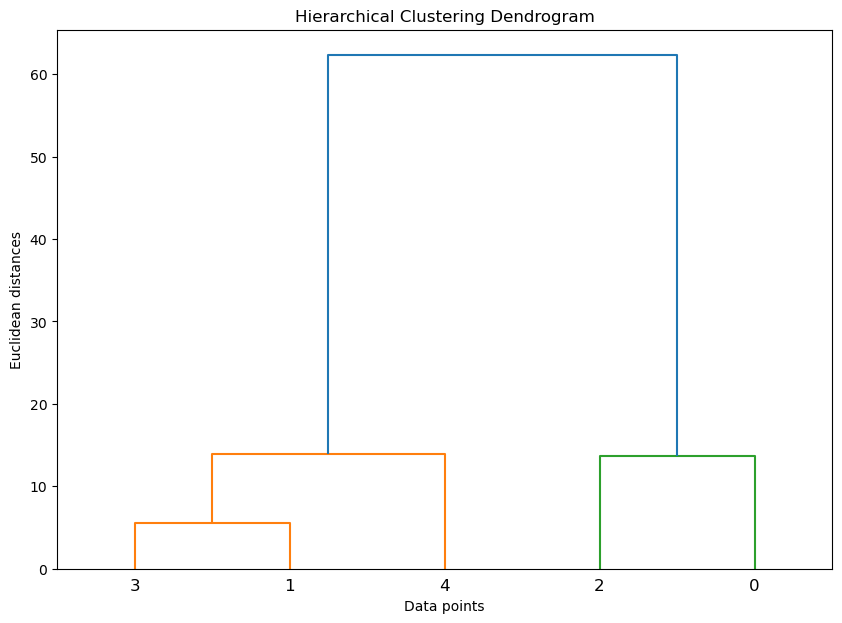

In [17]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index, distance_sort='descending', truncate_mode='level', p=3)
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model with the desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=2)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = dbscan.fit_predict(df)

In [19]:
cluster_labels

array([-1, -1, -1, -1, -1], dtype=int64)

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()
data = iris_data.data
target = iris_data.target

# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [27]:
data = pd.DataFrame(data, columns=iris_data.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette score for K-means clustering:", silhouette_avg)

Silhouette score for K-means clustering: 0.45994823920518635


In [29]:
ss = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertia = kmeans.inertia_
    ss.append(inertia)  

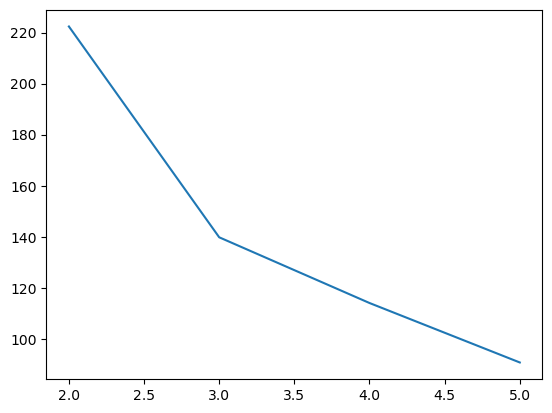

In [30]:
import matplotlib.pyplot as plt
k_list = list(range(2, 6))
plt.plot(k_list, ss)
plt.show()

In [31]:
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data and get the cluster assignments for each data point
cluster_labels = agglomerative.fit_predict(data)

# Compute the silhouette score
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette score for Hierarchical clustering:", silhouette_avg)

Silhouette score for Hierarchical clustering: 0.4466890410285909


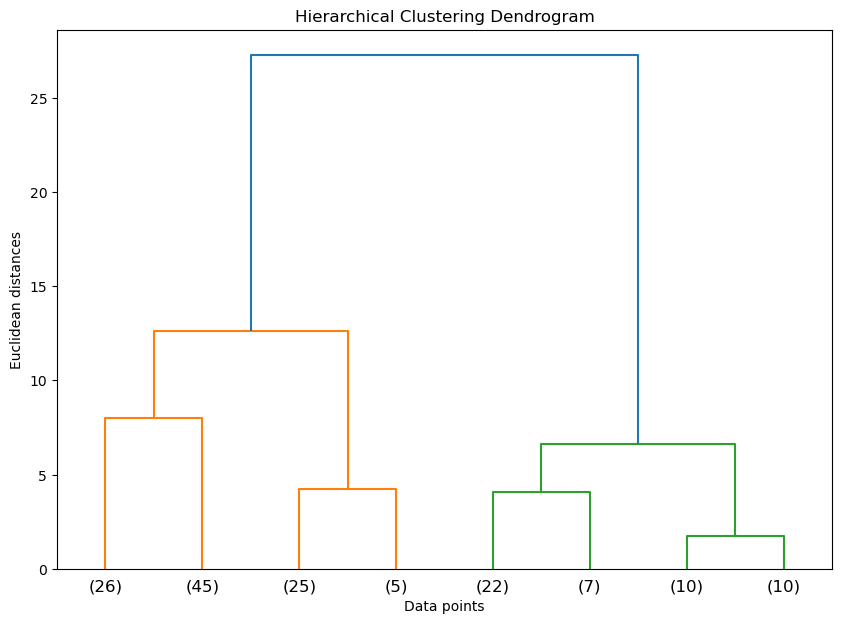

In [32]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
# function computes the linkage matrix using the Ward method as the criterion for merging clusters. The Ward method seeks to minimize the total within-cluster variance at each step.
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=np.array(iris_data.target_names)[target], distance_sort='descending', truncate_mode='level', p=2)
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [33]:
data.shape

(150, 4)

In [40]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine_data = load_wine()
data = wine_data.data
target = wine_data.target

# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [51]:
dbscan = DBSCAN(eps=2.2, min_samples=15)
cluster_labels = dbscan.fit_predict(data)
silhouette_avg = silhouette_score(data[cluster_labels != -1], cluster_labels[cluster_labels != -1])
print("Silhouette score for DBSCAN clustering:", silhouette_avg)

Silhouette score for DBSCAN clustering: 0.5397147148858059


In [39]:
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])